In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

advertising_data = pd.read_csv("/content/drive/MyDrive/ML/HW3/6/advertising.csv")
advertising_data.info()
advertising_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


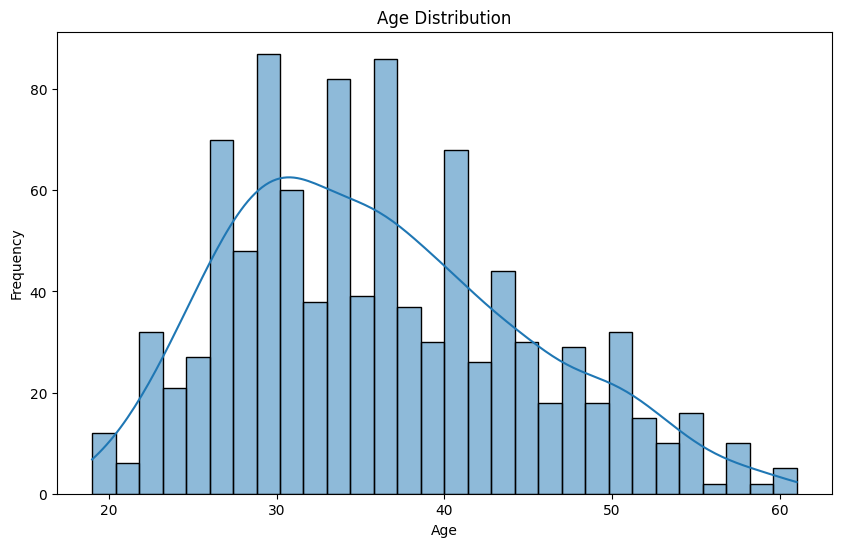

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns


# Plotting the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(advertising_data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


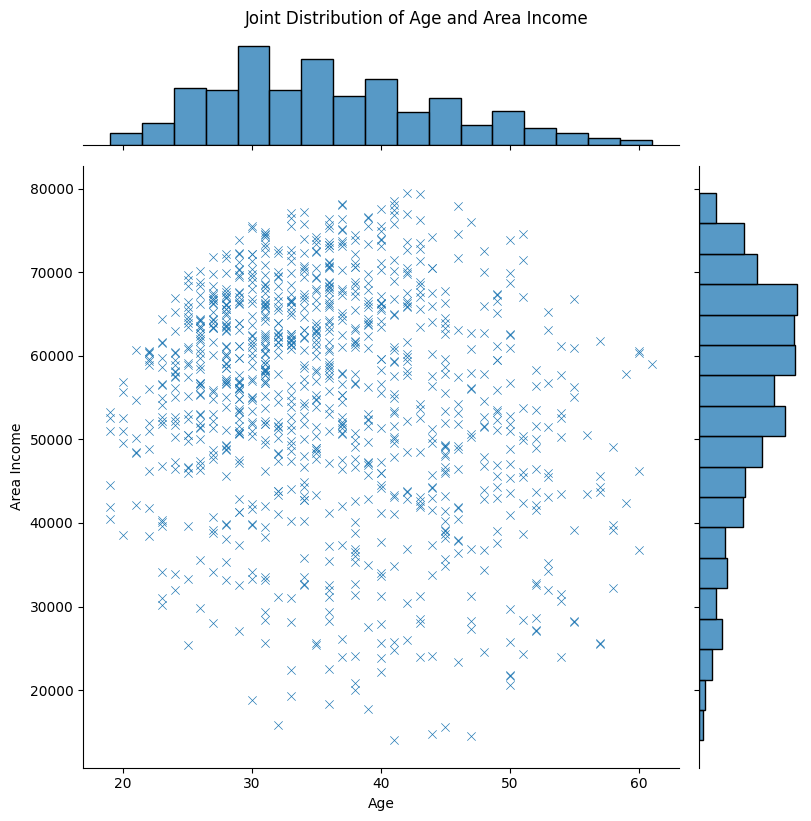

In [5]:
# Drawing a joint plot of income by age
sns.jointplot(x='Age', y='Area Income', data=advertising_data, kind='scatter', height=8 , marker = 'x')
plt.suptitle('Joint Distribution of Age and Area Income', y=1.02)
plt.show()


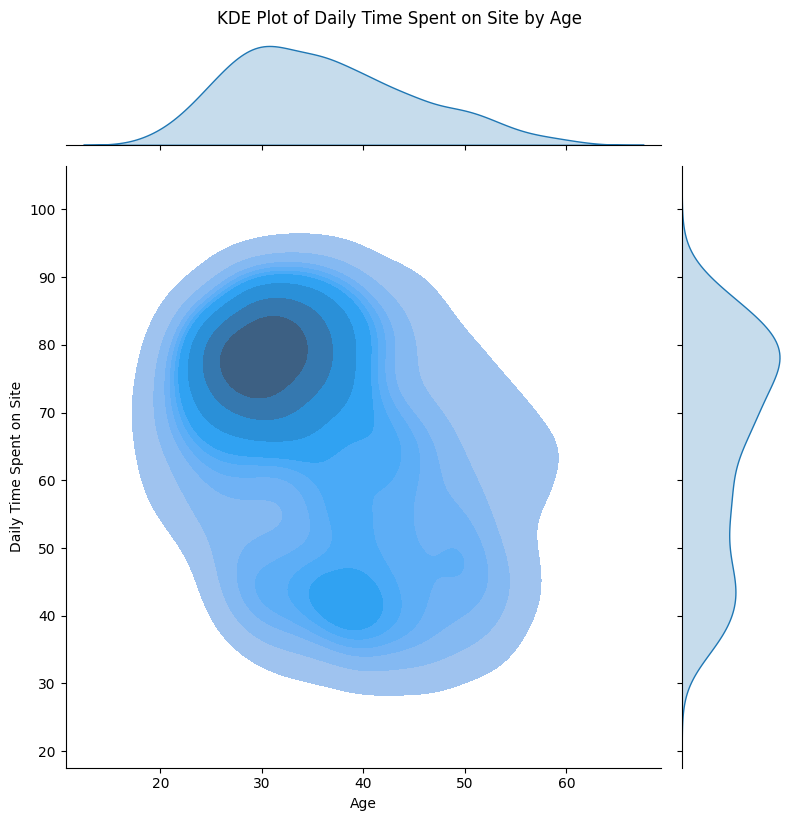

In [6]:
# Drawing a KDE plot of time spent on the site by age
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=advertising_data, kind='kde', height=8, fill=True)
plt.suptitle('KDE Plot of Daily Time Spent on Site by Age', y=1.02)
plt.show()


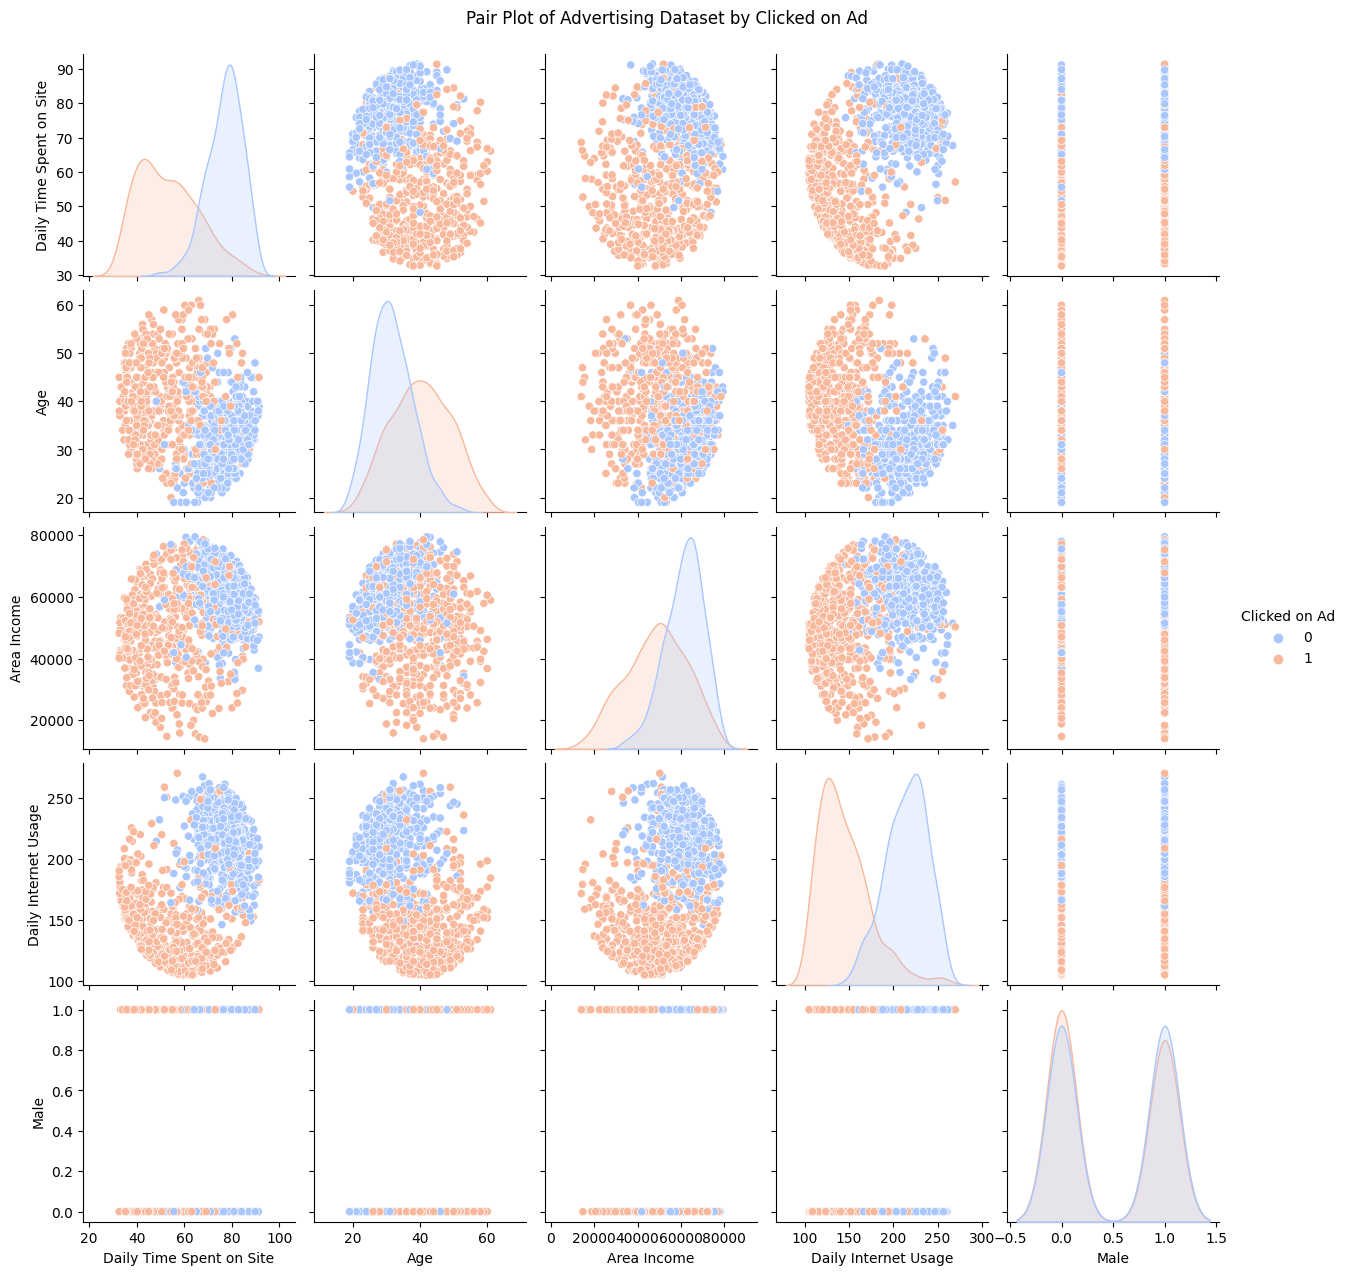

In [7]:
# Drawing a pair plot for the dataset
sns.pairplot(advertising_data, hue='Clicked on Ad', palette='coolwarm', height=2.5)
plt.suptitle('Pair Plot of Advertising Dataset by Clicked on Ad', y=1.02)
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Check for missing values
missing_values = advertising_data.isnull().sum()

# Assuming that 'Clicked on Ad' is the label
X = advertising_data.drop('Clicked on Ad', axis=1)  # Features
y = advertising_data['Clicked on Ad']               # Labels

# Dropping non-numeric columns for simplicity
X_numeric = X.select_dtypes(include=['float64', 'int64'])

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

missing_values, X_train.shape, X_test.shape, y_train.shape, y_test.shape


(Daily Time Spent on Site    0
 Age                         0
 Area Income                 0
 Daily Internet Usage        0
 Ad Topic Line               0
 City                        0
 Male                        0
 Country                     0
 Timestamp                   0
 Clicked on Ad               0
 dtype: int64,
 (800, 5),
 (200, 5),
 (800,),
 (200,))

In [9]:
import numpy as np

class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _compute_cost(self, X, y):
        m = X.shape[0]
        y_pred = self._sigmoid(np.dot(X, self.weights) + self.bias)
        cost = (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return cost

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for i in range(self.num_iterations):
            # Forward propagation
            y_pred = self._sigmoid(np.dot(X, self.weights) + self.bias)

            # Backward propagation
            dw = (1 / m) * np.dot(X.T, (y_pred - y))
            db = (1 / m) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        y_pred = self._sigmoid(np.dot(X, self.weights) + self.bias)
        return [1 if i > 0.5 else 0 for i in y_pred]

# Instantiate and train the logistic regression model
model = LogisticRegressionFromScratch()
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)




In [14]:
# Making predictions on the entire test set using the trained model
test_predictions = model.predict(X_test)

# Creating a DataFrame to display the predictions alongside the actual values
prediction_results = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions})

prediction_results

,Actual,Predicted
521,1,1
737,1,1
740,1,1
660,1,1
411,0,0
...,...,...
408,1,0
332,1,1
208,1,1
613,0,0


In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculating the classification report
class_report = classification_report(y_test, test_predictions)

# Calculating the accuracy score
accuracy = accuracy_score(y_test, test_predictions)

# Printing the resultsا

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("Accuracy Score:", accuracy)



Confusion Matrix:
[[87  2]
 [12 99]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        89
           1       0.98      0.89      0.93       111

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.94      0.93      0.93       200

Accuracy Score: 0.93
